# Error exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
agg_results = pd.read_pickle('lib/aggregation_results.pickle')

In [22]:
agg_comps = agg_results.Model.apply(pd.Series)
agg_disks = agg_comps['disk'].apply(pd.Series)
agg_bulges = agg_comps['bulge'].apply(pd.Series)
agg_bars = agg_comps['bar'].apply(pd.Series)

In [7]:
component_errors = agg_results.Errors.apply(pd.Series)

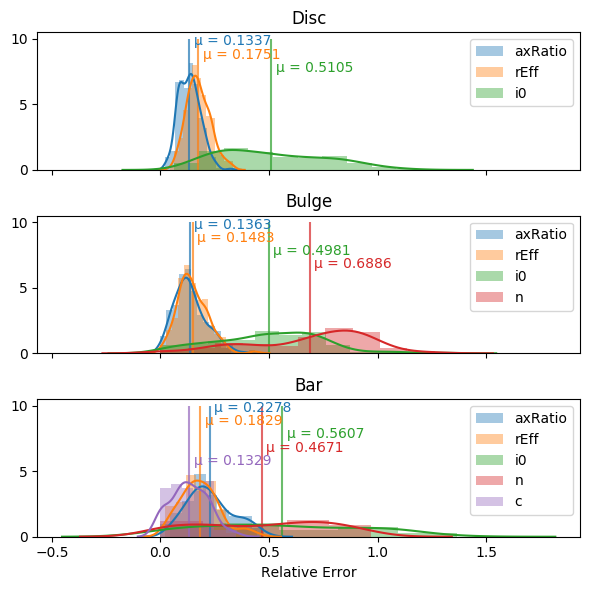

In [98]:
f, axs = plt.subplots(nrows=3, sharex=True, figsize=(6, 6), dpi=100)
errors_list = (disk_errors, bulge_errors, bar_errors)
values_list = (agg_disks, agg_bulges, agg_bars)
names = ('Disc', 'Bulge', 'Bar')

for i in range(3):
    errors = errors_list[i]
    values = values_list[i]
    plt.sca(axs[i])
    plt.title(names[i])
    for j, p in enumerate(('axRatio', 'rEff', 'i0', 'n', 'c')):
        c = 'C{}'.format(j)
        if errors[p].std() > 0.01:
            y = pd.concat(
                (values[p], errors[p].rename('error')),
                axis=1,
            ).eval(
                'error / {}'.format(p)
            ).dropna()
            sns.distplot(y, label=p, color=c)
            plt.vlines(y.mean(), 0, 10, color=c, alpha=0.7)
            plt.text(y.mean() + 0.02, 9.5 - j, 'μ = {:.4f}'.format(y.mean()), c=c)
    plt.legend()
axs[2].set_xlabel('Relative Error')
plt.tight_layout()
plt.savefig('method-paper-plots/relative-parameter-errors.pdf', bbox_inches='tight')

In [99]:
disk_errors = component_errors['disk'].apply(pd.Series).dropna()
(disk_errors).describe()

,axRatio,c,i0,n,rEff
count,292.000000,292.0,292.000000,292.0,292.000000
mean,0.093158,0.0,0.114991,0.0,4.951884
std,0.037466,0.0,0.070005,0.0,2.426142
min,0.011312,0.0,0.012764,0.0,0.625118
25%,0.064033,0.0,0.060715,0.0,3.144543
50%,0.090076,0.0,0.093332,0.0,4.524556
75%,0.121838,0.0,0.170744,0.0,6.407391
max,0.203730,0.0,0.383126,0.0,13.762912


In [19]:
bulge_errors = component_errors['bulge'].apply(pd.Series).dropna()
bulge_errors.describe()

,axRatio,c,i0,n,rEff
count,273.000000,273.0,273.000000,273.000000,273.000000
mean,0.104799,0.0,0.346014,1.225078,0.623664
std,0.048508,0.0,0.216990,0.643988,0.399063
min,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.068011,0.0,0.183984,0.629304,0.367969
50%,0.102002,0.0,0.295051,1.399288,0.558830
75%,0.141908,0.0,0.515011,1.726757,0.774123
max,0.226212,0.0,1.000067,2.482606,3.581399


In [15]:
bar_errors = component_errors['bar'].apply(pd.Series).dropna()
bar_errors.describe()

,axRatio,c,i0,n,rEff
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000
mean,0.073477,0.283816,1.458192e-01,0.367249,1.123412
std,0.031245,0.194652,1.226318e-01,0.284152,0.722936
min,0.011831,0.000000,3.399350e-17,0.000000,0.086117
25%,0.051064,0.159468,5.196152e-02,0.100570,0.581975
50%,0.071821,0.254362,9.852483e-02,0.293355,1.084136
75%,0.094338,0.425536,2.432694e-01,0.638428,1.446896
max,0.144244,0.819837,5.008326e-01,0.877515,4.367654
